In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Importar data
FR_df=pd.read_csv("FRvideos_cc50_202101.csv")

In [3]:
#Importar el json y extraer la data que nos interesa
import json
FR_category={}
with open("FR_category_id.json") as f:
    FR_data=json.load(f)
for i in list(pd.DataFrame(FR_data['items']).id.values):
    FR_category[i]=pd.DataFrame(FR_data['items'])[pd.DataFrame(FR_data['items']).id==i].snippet.values[0]['title']

In [4]:
#vemos la informacion de toda la informacion de las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [5]:
FR_df.sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
5375,GO4jzw-0Eu0,17.10.12,RONALDO VS MESSI - QUI EST LE MEILLEUR ?!,Footstyle TV,17,2017-12-08T14:30:00.000Z,"ronaldo""|""vs""|""messi""|""footstyle tv""|""meilleur""|""joueur""|""ronaldo vs messi""|""freestyle""|""neymar""|""ballon d'or",72216,4124,50,4519,https://i.ytimg.com/vi/GO4jzw-0Eu0/default.jpg,False,False,False,"Cristiano Ronaldo vient d'obtenir son 5ème ballon d'or, mais on ne sait toujours pas qui est le meilleur entre Messi et Ronaldo ? Qu'en pensez-vous ?\n\nRetrouve toutes nos sappes sur le Shop : http://footstyle-shop.com/\n\nNos sources pour écrire cette vidéo : \n\nhttp://www.goal.com/fr/news/6159/statistiques/2016/11/08/29305702/messi-et-ronaldo-qui-est-le-plus-fort-goal-fait-le-bilan\n\nhttp://www.goal.com/fr/news/messi-vs-ronaldo-qui-est-le-plus-decisif-tous-les-ans/10e85ingbtrsv1cwgpv7n3t9sy\n\nhttps://www.buzzarena.com/meilleur-buteur-cristiano-ronaldo-contre-messi-21990\n\nTwitter : http://www.twitter/FootstyleTV\nSnapchat : footstyle\nFacebook : http://www.facebook.com/footstyletv\nInstagram : http://instagram.com/footstyletv",Guinaa,4.729981,-52.330021,POINT (-52.33002059 4.729981302)
5144,lElPjiVSYqg,17.09.12,IL NE FAUT ABSOLUMENT PAS PERDRE!! 😂 #FBD EPISODE 1,S3 Freestyle,17,2017-12-07T16:00:09.000Z,"S3""|""S3society""|""S3freestyle""|""Freestylefootball""|""Freestyle""|""Football""|""Streetsoccer""|""Street""|""Soccer""|""Ball""|""Skills""|""Skillz""|""Crazy""|""Amazing""|""Dope""|""Bestfootball""|""Internet""|""Cristiano""|""CR7""|""Messi""|""Ronaldo""|""Cristianoronaldo""|""Trafalgar""|""Lisazimouche""|""Andreascetkovic""|""Mosswassim""|""Wassfreestyle""|""S3school""|""Tutoriel""|""Tuto""|""Tutorial""|""Fifa""|""Barcelone""|""Realmadrid""|""Chelsea""|""Bayern""|""Panna""|""Petitpont""|""Tunnel""|""Akka""|""Tourdumonde""|""ATW""|""Lower""|""Upper""|""Sitdown""|""Blocage""|""Groundmoves""|""Soufianebencok""|""Melodydonchet""|""Adidas",69334,5741,24,154,https://i.ytimg.com/vi/lElPjiVSYqg/default.jpg,False,False,False,Nouveau jour nouvelle video nouvelle série!!\nCelui qui perd devra danser 😂\n\nFACEBOOK: https://www.facebook.com/S3freestylers/?fref=ts\nINSTAGRAM: https://www.instagram.com/s3society_official/\nTWITTER: https://twitter.com/s3society\nNOS BALLONS: http://www.urbanball.com\nSite web: http://www.streetstylesociety.com,Amapa,3.910471,-51.810001,POINT (-51.81000065 3.9104706)
7456,xuHTgzchlYg,17.21.12,Je prends ma RS6 !! Ma voiture préférée 😈,GMK,2,2017-12-20T16:02:18.000Z,"GMK001""|""GMK""|""Maroun""|""Kikano""|""C63""|""AMG""|""camouflage""|""Camo""|""RS6""|""M3""|""Sound""|""Top""|""speed""|""Audi""|""Bentley""|""Mercedes""|""C63 AMG",115345,8547,86,1520,https://i.ytimg.com/vi/xuHTgzchlYg/default.jpg,False,False,False,http://www.instagram.com/gmk001,Pays De La Loire,47.480008,-0.530030,POINT (-0.530029949 47.48000755)


In [6]:
#valores nulos en cada columna
FR_df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

In [7]:
#Analizando  la media, moda,desv estandar, etc.
FR_df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40724.000000,4.072400e+04,4.072400e+04,4.072400e+04,4.072400e+04,40724.000000,40724.000000
mean,20.123809,4.199219e+05,1.738886e+04,8.149624e+02,1.832453e+03,36.986535,-2.314779
std,6.984422,1.772130e+06,8.720509e+04,1.139219e+04,1.404321e+04,19.889834,25.443453
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-21.033511,-61.532999
25%,17.000000,1.697450e+04,3.380000e+02,1.800000e+01,5.600000e+01,42.699989,-0.530030
50%,23.000000,7.372100e+04,1.892500e+03,8.300000e+01,2.350000e+02,45.899975,2.666648
75%,24.000000,2.708088e+05,7.969500e+03,3.350000e+02,8.410000e+02,48.516663,6.030009
max,44.000000,1.009116e+08,4.750254e+06,1.353661e+06,1.040912e+06,50.283325,55.712816


In [8]:

#analizando valores atipicos
columns_to_plot = ['category_id','views', 'likes', 'dislikes', 'comment_count','lat','lon']
Q1 = FR_df[columns_to_plot].quantile(0.25)
Q3 = FR_df[columns_to_plot].quantile(0.75)
IQR = Q3 - Q1

outliers = ((FR_df[columns_to_plot] < (Q1 - 1.5 * IQR)) | (FR_df[columns_to_plot] > (Q3 + 1.5 * IQR)))
outliers.sum()


category_id      2931
views            5163
likes            5695
dislikes         5174
comment_count    5078
lat              8671
lon              8671
dtype: int64

In [9]:
# Verificar valores nulos en las columnas de interés
null_values = FR_df[[	'category_id','views','likes', 'dislikes', 'comment_count',	'lat', 'lon', 'geometry', 'state']].isnull().sum()
print(null_values)

category_id      0
views            0
likes            0
dislikes         0
comment_count    0
lat              0
lon              0
geometry         0
state            0
dtype: int64


In [10]:
#Analizando los tipos de datos
FR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  int64  
 5   publish_time            40724 non-null  object 
 6   tags                    40724 non-null  object 
 7   views                   40724 non-null  int64  
 8   likes                   40724 non-null  int64  
 9   dislikes                40724 non-null  int64  
 10  comment_count           40724 non-null  int64  
 11  thumbnail_link          40724 non-null  object 
 12  comments_disabled       40724 non-null  bool   
 13  ratings_disabled        40724 non-null  bool   
 14  video_error_or_removed  40724 non-null

In [11]:
#Obtener la cantidad de filas duplicadas del dataframe
FR_df[FR_df.duplicated()].shape[0]

0

In [12]:
#Verificamos si los comentarios estan desabilitados para ciertos videos
FR_df.comments_disabled.value_counts()

comments_disabled
False    39835
True       889
Name: count, dtype: int64

In [13]:
#Verificamos si los likes estan  desabilitados para ciertos videos
FR_df.ratings_disabled.value_counts()

ratings_disabled
False    40020
True       704
Name: count, dtype: int64

In [14]:
#Veremos si los videos tuvieron un error o han sido removidos 
FR_df.video_error_or_removed.value_counts()

video_error_or_removed
False    40702
True        22
Name: count, dtype: int64

Problemas Reportados 
-El tipo de data de category_id debe ser objeto en ves de entero.
-La tipo de dato de trending_date y publish_time deben ser datetime en ves de object.
-No hay columnas duplicadas.
-Hay videoos removidos, likes desabilitados y comentarios desabilitados.
-No hay datos vacios
-Hay datos atipicos, sin embargo los que pueden afectar nuestros resultados son  views, likes, dislikes, comment_count, por lo que hay que aplicarles una tranformacion.

-Hay columnas Inecesarias 'thumbnail_link','tags', 'description'



DATA CLEANING


In [15]:
#Crear el dataset de francia para realizar la limpieza
copy_FR=FR_df.copy()

In [16]:
#Eliminar columnas innecesarias
copy_FR.drop(['thumbnail_link','tags','tags','description'],axis=1,inplace=True)


In [ ]:
#Haciendo una prueba para ver si han sido eliminadas


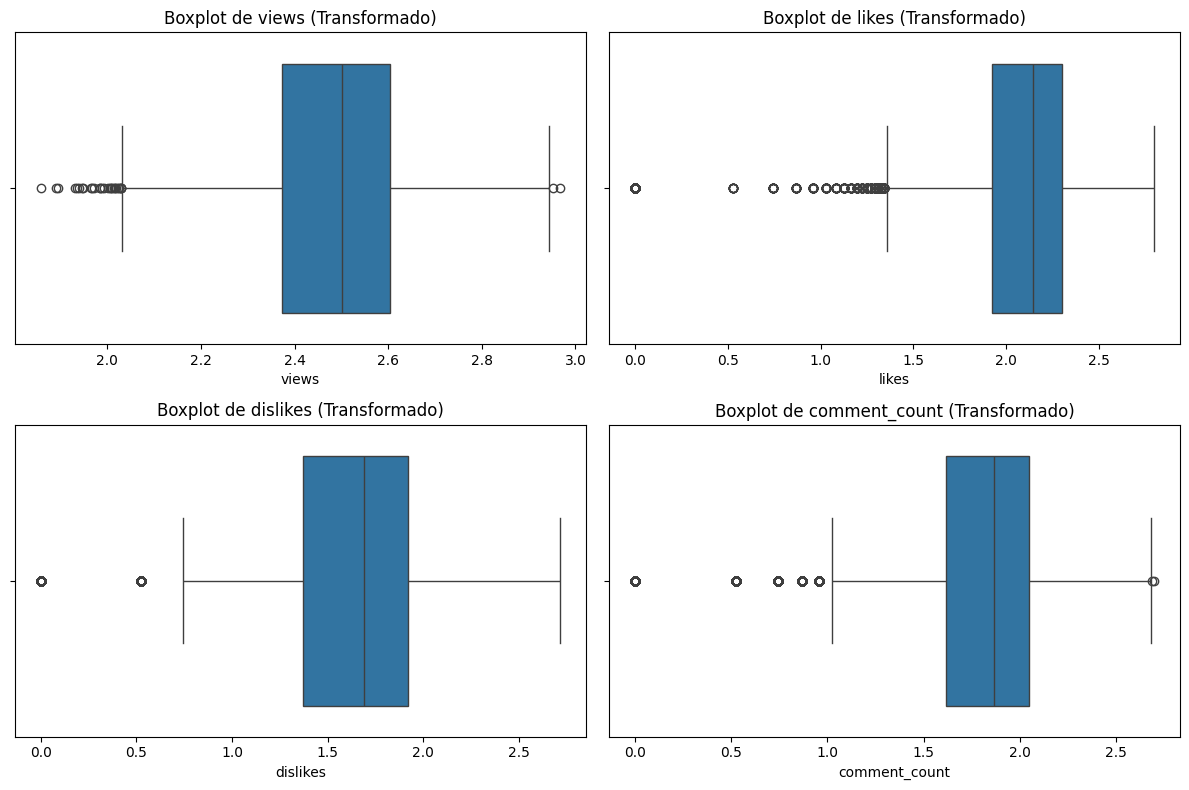

In [25]:
# Lista de columnas para aplicar la transformación logarítmica
columns_to_transform = ['views', 'likes', 'dislikes', 'comment_count']

# Aplicar logaritmo a las columnas seleccionadas
copy_FR[columns_to_transform] = np.log1p(copy_FR[columns_to_transform])

# Crea subgráficos para cada columna transformada
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_transform, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=np.log1p(copy_FR[column]))  # Aplica la transformación logarítmica aquí
    plt.title(f'Boxplot de {column} (Transformado)')

plt.tight_layout()
plt.show()

In [29]:
FR_df.sample(3)




,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
15174,6irGLKAIgbc,18.30.01,"SUBMЕRGЕNCЕ Official Trailer (2018) James McAvoy, Alicia Vikander Survival Movie HD",ONE Media,1,2018-01-29T14:50:24.000Z,"Cinema""|""Trailer""|""Official""|""Movie""|""Film""|""James McAvoy""|""Alicia Vikander",11.845856,7.027315,3.850148,4.043051,https://i.ytimg.com/vi/6irGLKAIgbc/default.jpg,False,False,False,"SUBMЕRGЕNCЕ Trailer (2018) James McAvoy, Alicia Vikander Movie HD\n© 2018 - LG\n\nComedy, Kids, Family and Animated Film, Blockbuster, Action Cinema, Blockbuster, Scifi Movie or Fantasy film, Drama... We keep you in the know! \n\nSubscribe now to catch the best movie trailers 2017 and the latest official movie trailer, film clip, scene, review, interview.",Bourgogne,46.983733,3.166669,POINT (3.166669473 46.98373293)
38013,BacnICPYak0,18.01.06,قناة الجزيرة تكشف الأسباب الحقيقية لإستقالة زيدان وهوية المدرب الجديد,Dima Tv Sport,17,2018-05-31T14:24:15.000Z,"زين الدين زيدان|""زين الدين زيدان يصلي""|""زين الدين زيدان فرنسا""|""زين الدين زيدان في ريال مدريد""|""زين الدين زيدان زيزو""|""زين الدين زيدان يتكلم عربي""|""زين الدين زيدان يلعب كرة""|""زين الدين زيدان يتكلم عن محمد صلاح""|""زين الدين زيدان وبوفون""|""زين الدين زيدان والبرازيل""|""زين الدين زيدان والشوالي""|""زين الدين زيدان ومحمد صلاح""|""هدف زين الدين زيدان""|""زين الدين زيدان نهائي كاس العالم""|""استقالة زيدان""|""تقرير استقالة زيدان""|""خبر استقالة زيدان""|""استقالة زين الدين زيدان""",13.189179,7.899153,6.144186,6.432940,https://i.ytimg.com/vi/BacnICPYak0/default.jpg,False,False,False,قناة الجزيرة تكشف الأسباب الحقيقية لإستقالة زين الذين زيدان وهوية المدرب الجديد لفريق ريال مدريد الاسباني,Bretagne,48.516663,-2.783303,POINT (-2.783303265 48.51666262)
19249,4yG7mB_uY3E,18.20.02,[AMA SUPERCROSS 2018] Etape 07: Arlington (intégral),AB Moteurs,2,2018-02-19T12:05:58.000Z,"AB Moteurs""|""AB Moteur""|""circuit""|""ama supercross""|""ama sx us""|""marvin musquin""|""mm25""|""eli tomac""|""cole seely""|""anderson""|""ktm racing factory""|""honda""|""yamaha""|""ken roczen""|""3 finales""|""elie tomac vainqueur""|""2018""|""plessinger""|""Barcia""|""cooper webb""|""chad reed""|""shane mcelrath""|""triple crown""|""dylan ferrandis""|""ferrandis""|""supercross arlington""|""east cost""|""sx arlington""|""chute dylan ferrandis""|""arlington 2018""|""ama supercross arlington 2018""|""ama supercross 2018""|""ama supercross 2018 arlington 450 main",9.351406,5.023881,1.791759,2.890372,https://i.ytimg.com/vi/4yG7mB_uY3E/default.jpg,False,False,False,"Après le départ à la retraite du « Roi » du SX Ryan Dungey , la bataille va être très serrée cette année pour tenter de remporter le championnat !\nEn 450cc, tous les meilleurs challengers seront sur la grille de départ: \nEli Tomac, Ken Roczen, Jason Anderson, David Millsaps, Cole Seely, Dean Wilson, Chad Reed, Cooper Webb… et surtout notre frenchie Marvin Musquin, qui compte bien réitérer son exploit de 2017, voire décrocher le trophée !\n\n✅ Rejoins-nous pour découvrir tout l'univers AB Moteurs:\n\n▶️ Facebook: https://www.facebook.com/ABMoteursTV\n▶️ Twitter: https://twitter.com/ABMoteursTV\n▶️ Site: http://www.abmoteurs.fr/",Haute Normandie,49.933734,1.083334,POINT (1.083334105 49.93373374)
